#  Using decision trees to prepare a model on fraud data

In [1]:
!pip install scikit-learn


In [2]:
# Importing required libraries for the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


import warnings
warnings.filterwarnings("ignore")


In [3]:
fraud=pd.read_csv("Fraud_check.csv")

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [8]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
fraud.size

3600

In [10]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [11]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [12]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
fraud.duplicated().sum()

0

In [14]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [15]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [16]:
features=(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'])

In [17]:
features

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

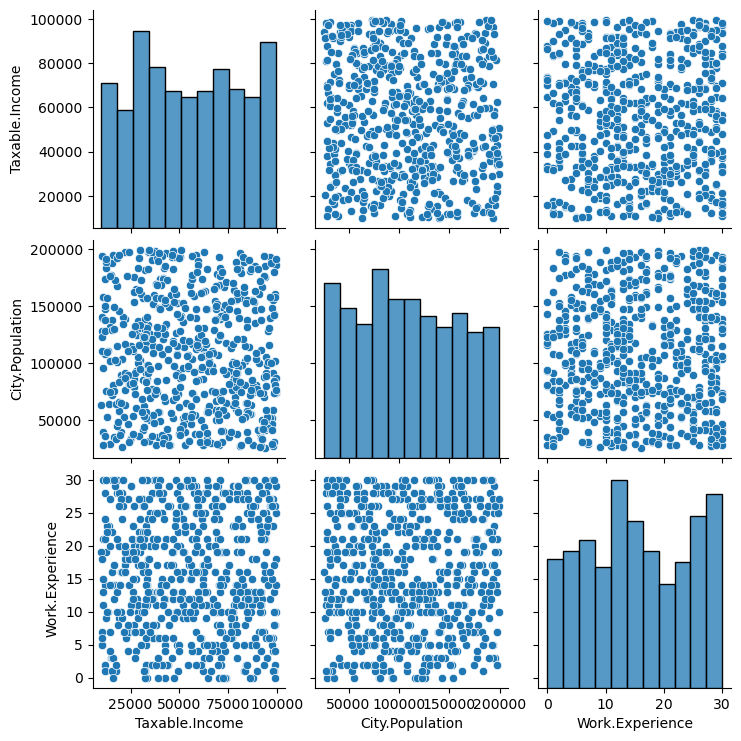

In [18]:
sns.pairplot(fraud[features])


In [19]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable

fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [20]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [21]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good

fraud["TaxInc"]=pd.cut(fraud["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky","Good"])

In [22]:
fraud["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [23]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

<Axes: >

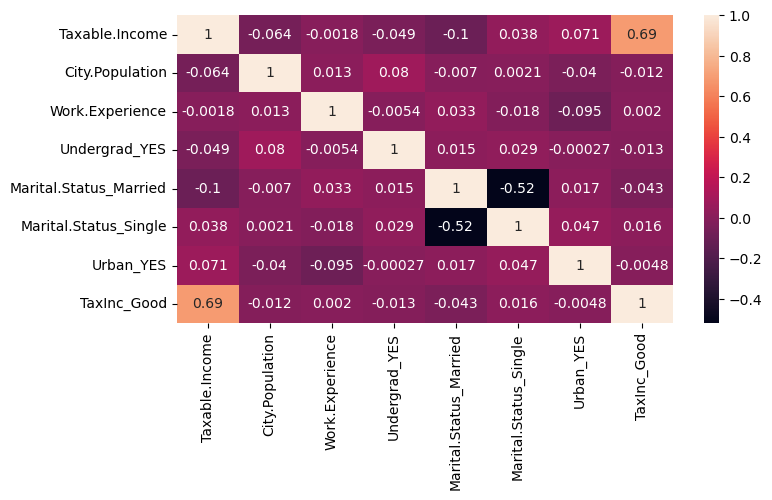

In [24]:
# Generating the Heatmap

plt.figure(figsize=(8,4))
sns.heatmap(fraud.corr(),annot=True)

<Figure size 3000x1000 with 0 Axes>

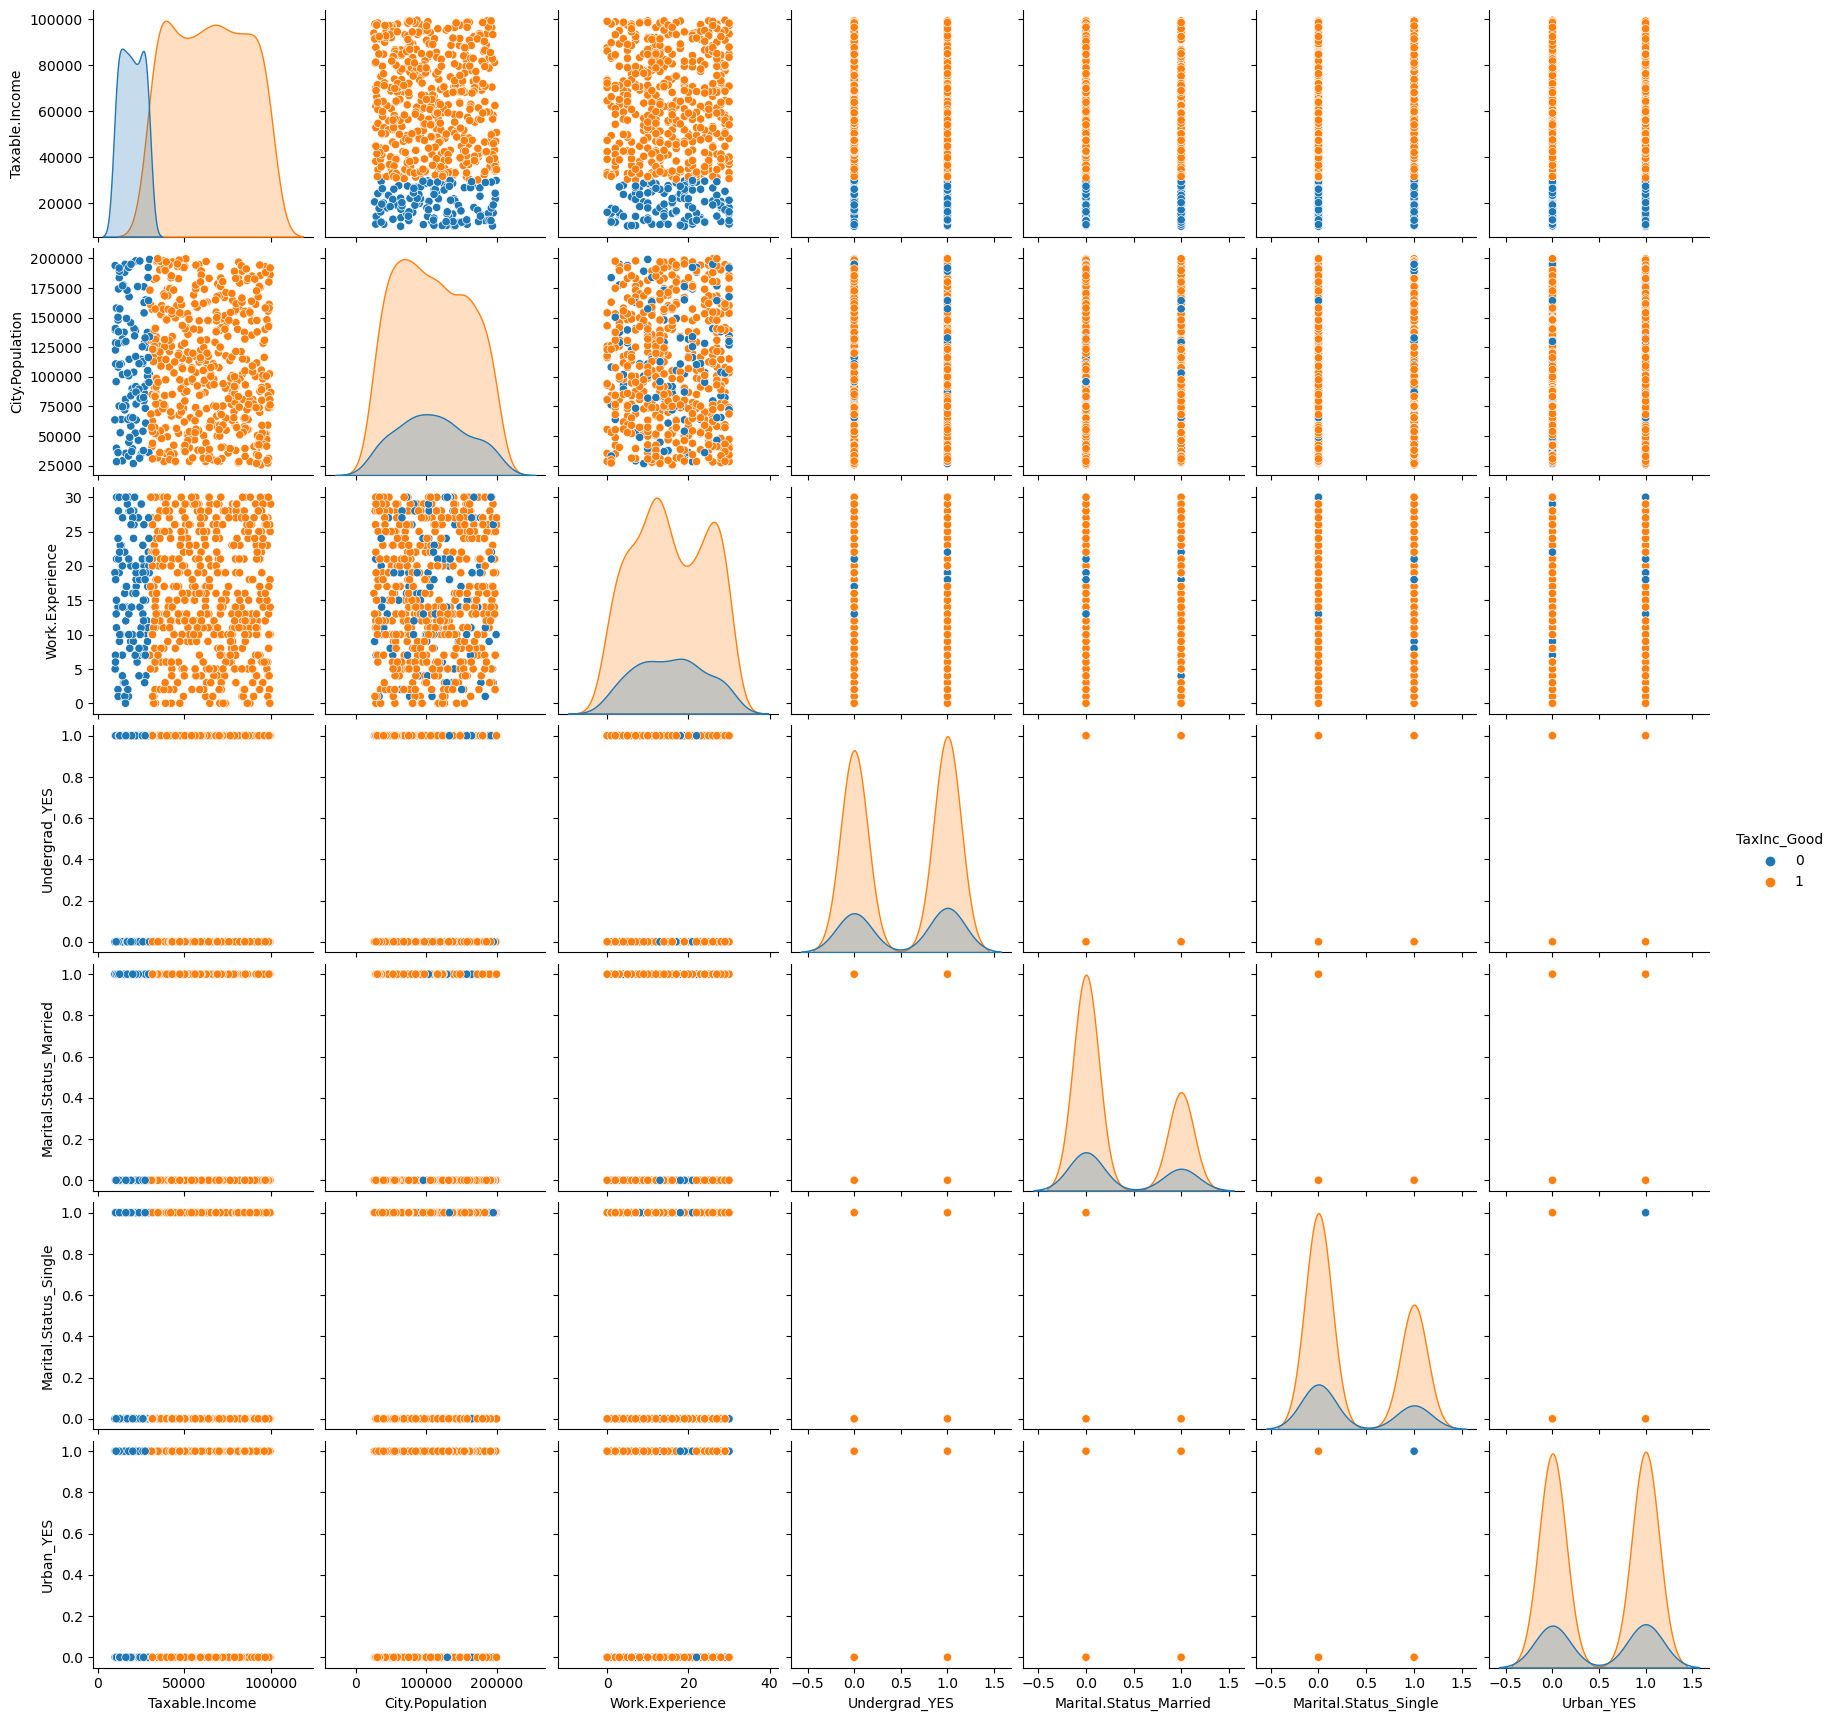

In [25]:
# let's plot pair plot to visualise the attributes all at once

plt.figure(figsize=(30,10))
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

In [26]:
# Normalizing the function

def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)

In [27]:
# Normalized data frame (considering the numerical part of data)

df_norm = norm_func(fraud.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,85194.851844,14.0,0.0,1.0,0.0,1.0,1.0
591,132858.851844,18.0,1.0,0.0,1.0,1.0,0.0
592,75142.851844,16.0,1.0,0.0,1.0,0.0,1.0
593,131962.851844,10.0,0.0,0.0,0.0,1.0,1.0
594,97525.851844,9.0,0.0,1.0,0.0,1.0,1.0
595,39491.851844,7.0,1.0,0.0,0.0,1.0,1.0
596,55368.851844,2.0,1.0,0.0,0.0,1.0,1.0
597,154057.851844,0.0,0.0,0.0,0.0,1.0,1.0
598,180082.851844,17.0,1.0,1.0,0.0,0.0,1.0
599,158136.851844,16.0,0.0,0.0,0.0,0.0,1.0


In [28]:
#Declaring the features and target

#Independent and Dependent variable

x=df_norm.drop(["TaxInc_Good"],axis=1)
y=df_norm["TaxInc_Good"]

In [29]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50046.851844,10.0,0.0,0.0,1.0,1.0
1,134074.851844,18.0,1.0,0.0,0.0,1.0
2,160204.851844,30.0,0.0,1.0,0.0,1.0
3,193263.851844,15.0,1.0,0.0,1.0,1.0
4,27532.851844,28.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,39491.851844,7.0,1.0,0.0,0.0,1.0
596,55368.851844,2.0,1.0,0.0,0.0,1.0
597,154057.851844,0.0,0.0,0.0,0.0,1.0
598,180082.851844,17.0,1.0,1.0,0.0,0.0


In [30]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [31]:
# Splitting the data into training and testing

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)


In [32]:
#Converting the Taxable income variable to bucketing.

df_norm["income"]="<30000"
df_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"


In [33]:
# Dropping the taxable income variable

fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [34]:
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [35]:
fraud.head()

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [36]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [37]:
# Splitting the data into Features and labels

features=fraud.iloc[:,0:5]
labels=fraud.iloc[:,5]

In [38]:
features

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,0
596,55369,2,1,0,0
597,154058,0,0,0,0
598,180083,17,1,1,0


In [39]:
labels

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban_YES, Length: 600, dtype: uint8

In [40]:
# Collecting the column names

colnames=list(fraud.columns)
predictiors=colnames[0:5]
target=colnames[5]


In [41]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3,random_state=40)


In [42]:
#Model Building

from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs=3,n_estimators=15,oob_score=True,criterion="entropy")
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [43]:
model.estimators_
model.classes_
model.n_classes_

2

In [44]:
model.oob_score_

0.4785714285714286

In [45]:
print(model.oob_score_.mean()*100)

47.85714285714286


In [46]:
# Prediction Training Data

prediction=model.predict(xtrain)

In [47]:
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [48]:
# Accuracy score

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytrain,prediction)
print(accuracy.mean()*100)

98.57142857142858


In [49]:
np.mean(prediction==ytrain)

0.9857142857142858

In [50]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(ytrain,prediction)

In [51]:
confusion

array([[208,   2],
       [  4, 206]], dtype=int64)

In [52]:
# Prediction test data

pred_test=model.predict(xtest)

In [53]:
pred_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1], dtype=uint8)

In [54]:
# Accuracy score

acc_test=accuracy_score(ytest,pred_test)
print(acc_test.mean()*100)

56.111111111111114


#  Building Decision Tree Classifier using Entropy Criteria

In [55]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

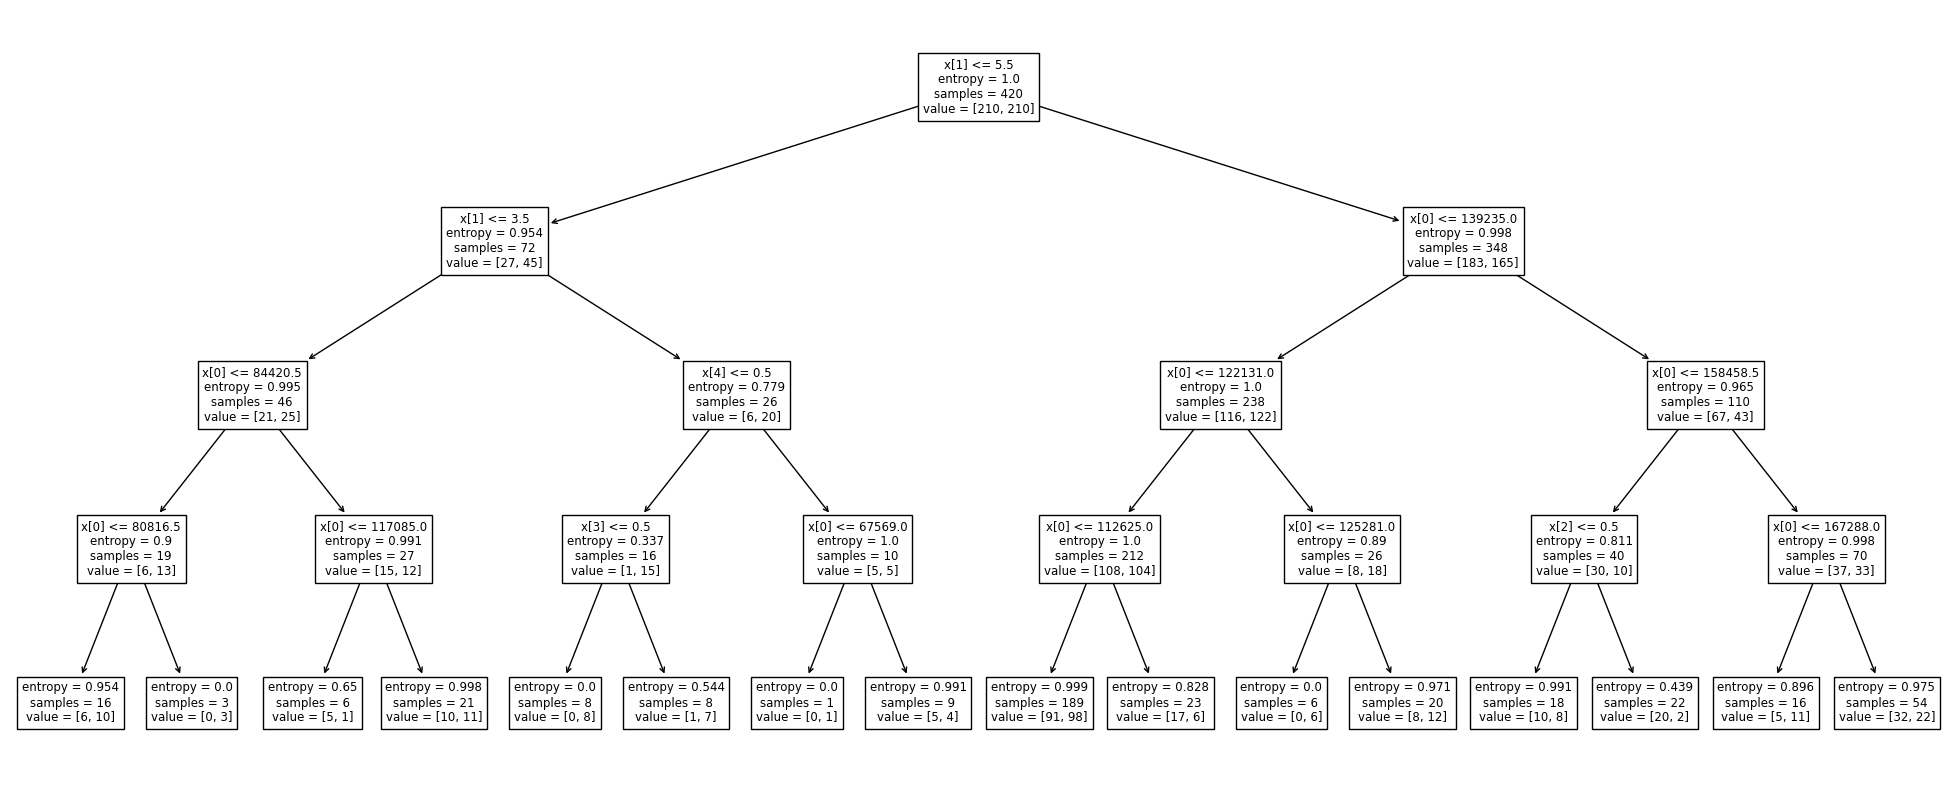

In [56]:
# Plotting the tree

plt.figure(figsize=(25,10))
from sklearn import tree
tree.plot_tree(model);

In [57]:
colnames=list(fraud.columns)

In [58]:
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

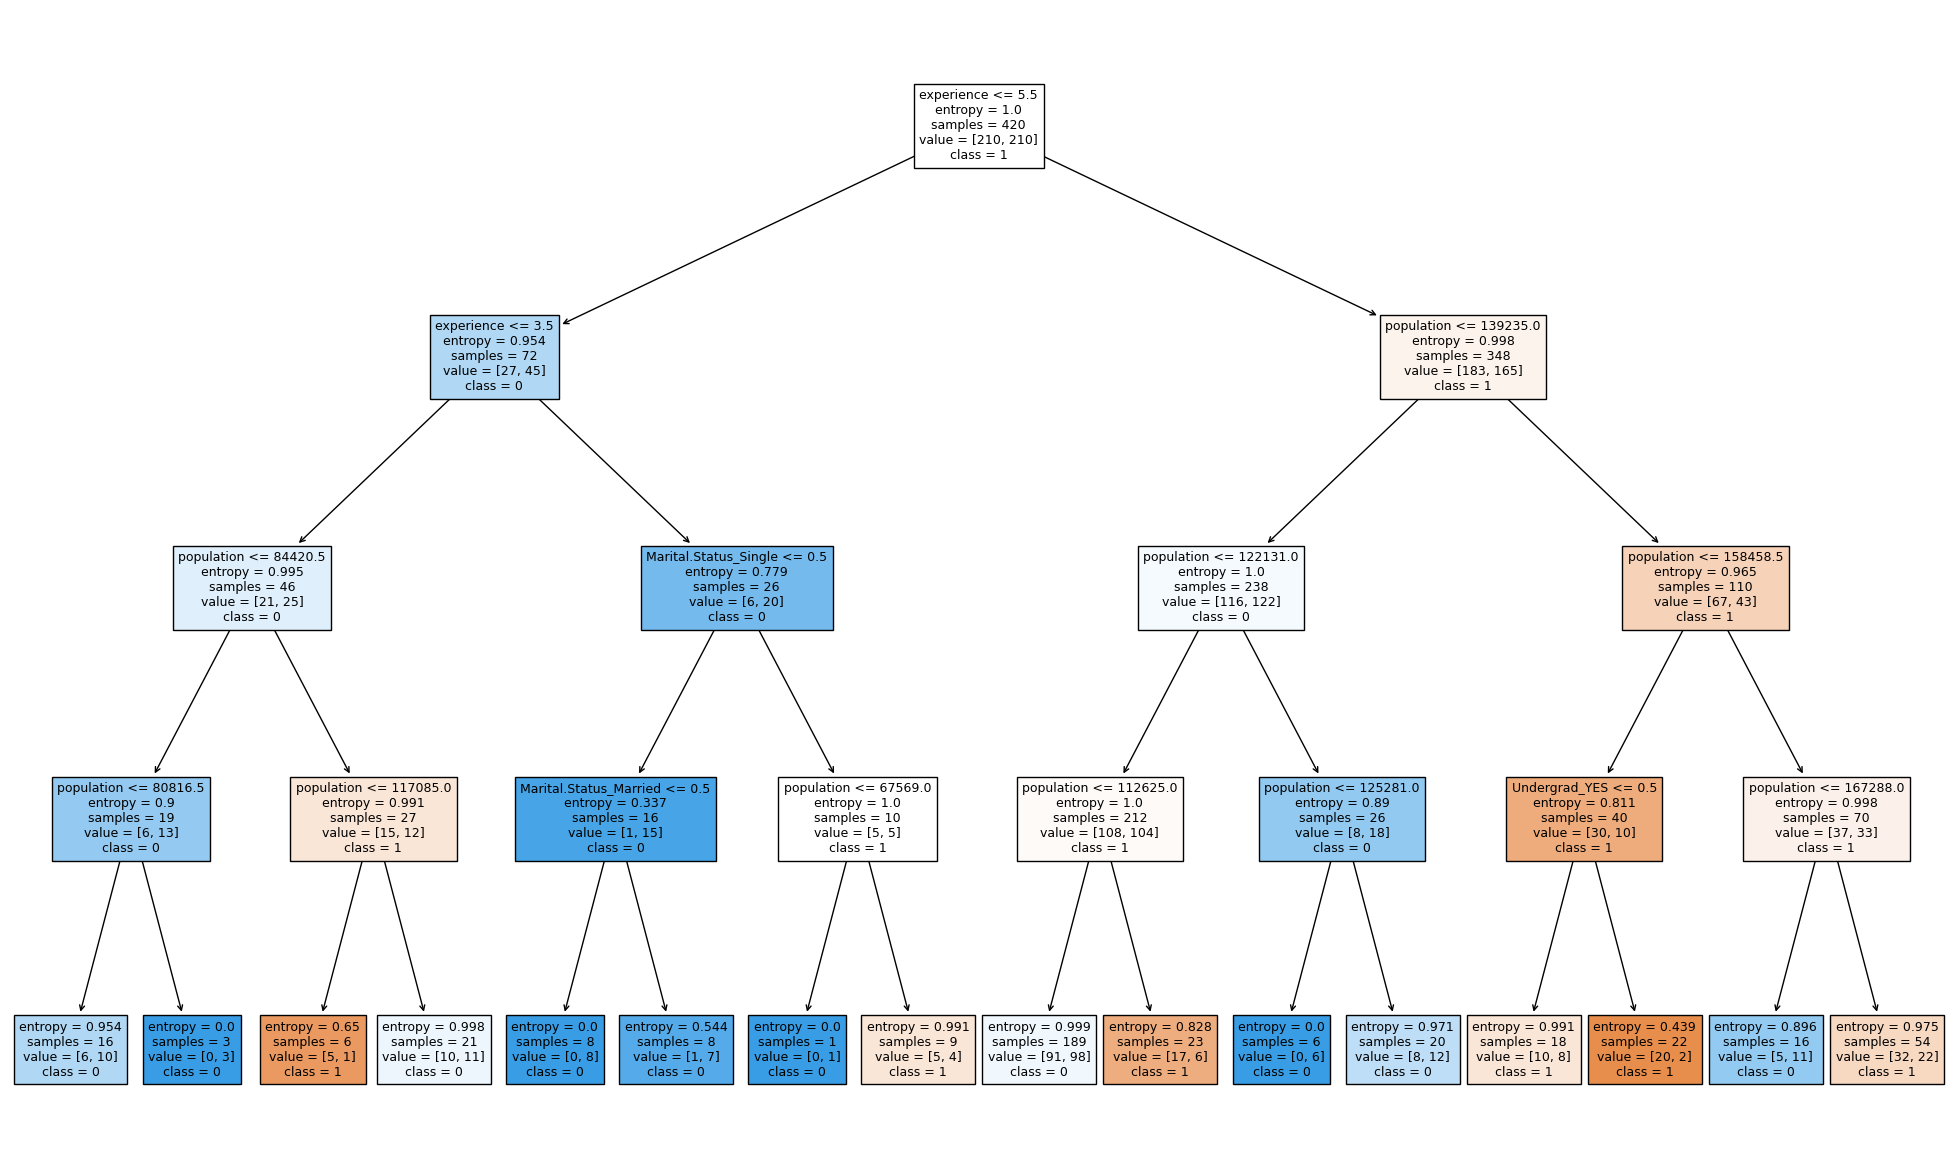

In [59]:
plt.figure(figsize=(25,15))
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=["1","0"]
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True,fontsize=9);


In [60]:
#Predicting on the test data

preds=model.predict(xtest)
pd.Series(preds).value_counts()
preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=uint8)

In [61]:
# getting the 2 way table to understand the correct and wrong predictions

pd.crosstab(ytest,preds) 

col_0,0,1
Urban_YES,,
0,27,61
1,29,63


In [62]:
# Accuracy Score

np.mean(preds==ytest)

0.5

#  Building Decision Tree Classifier (CART) using Gini Criteria

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=4)

In [89]:
model_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [90]:
# Predicting and computing the accuracy

pred2=model.predict(xtest)
pd.Series(pred2).value_counts()


1    122
0     58
dtype: int64

In [91]:
pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0], dtype=uint8)

In [92]:
pd.crosstab(ytest,pred2)

col_0,0,1
row_0,,
0,32,52
1,26,70


In [93]:
np.mean(pred2==ytest)

0.5666666666666667

 #  Decision Tree Regression Example

In [94]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
array=fraud.values
x=array[:,0:5]
y=array[:,5]

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)


In [96]:
model1=DecisionTreeRegressor()
model1.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [98]:
pred=model.predict(xtest)
np.mean(preds==ytest).mean()*100

56.666666666666664